In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/heart.csv')

In [6]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [7]:
from sklearn.preprocessing import LabelEncoder

# Let's say df is your DataFrame
label_encoders = {}
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope','RestingECG']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1


In [9]:
#cols = df.select_dtypes(include=['object']).columns.tolist()
#df[cols] = df[cols].astype('category').apply(lambda x: x.cat.codes)
#When Your Code is Fine:
#Use your .cat.codes approach only when:
#You're using tree-based models like Random Forest, XGBoost, LightGBM.
#The categories are not ordinal, and the model won't misinterpret the numeric codes.

In [10]:
df.shape

(918, 12)

In [11]:
X = df.iloc[:,0:11]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

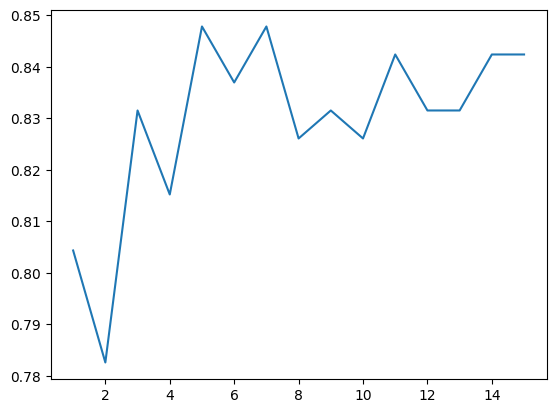

In [15]:
plt.plot(range(1,16),scores)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.8478260869565217

In [17]:
knn1 = KNeighborsClassifier()

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn1, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [19]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8787624638896656
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [20]:
knn2 = KNeighborsClassifier(n_neighbors=9, p=1,weights = 'distance')
knn2.fit(X_train,y_train)
y_pre = knn2.predict(X_test)

accuracy_score(y_test, y_pre)

0.8913043478260869

In [21]:
X_test_df = pd.DataFrame(X_test) # Convert X_test back to a Pandas DataFrame
X_test_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
180,0.999024,-1.849780,-0.809746,-1.360226,0.640966,-0.542709,0.017342,1.296679,1.192662,0.826971,-0.588805
1,-0.069591,0.540605,1.316743,0.647765,2.943471,-0.542709,0.017342,-0.244093,-0.838461,-0.836286,-0.588805
29,-2.313682,0.540605,0.253498,-1.251686,0.234098,-0.542709,0.017342,1.889283,-0.838461,-0.836286,1.079855
48,-0.069591,0.540605,-0.809746,-0.708985,-1.846478,1.842609,0.017342,-0.639162,-0.838461,-0.836286,-0.588805
2,1.212747,0.540605,-0.809746,1.461816,-1.846478,1.842609,1.608504,-0.560148,-0.838461,0.272552,-0.588805


In [22]:
df.iloc[147]

,147
Age,43.0
Sex,0.0
ChestPainType,1.0
RestingBP,120.0
Cholesterol,249.0
FastingBS,0.0
RestingECG,2.0
MaxHR,176.0
ExerciseAngina,0.0
Oldpeak,0.0


In [23]:
knn2.predict([[1.212747,	-1.849780,	1.316743,	0.376415,	2.009523,	1.842609,	-1.573819,	0.822595,	-0.838461,	-0.097061,	1.079855]])

array([0])

In [24]:
knn2.predict([[43.0, 0.0, 1.0, 120.0, 249.0, 0.0, 2.0, 176.0, 0.0, 0.0, 2.0]])

array([0])